# CISC 672 Project by Rene Tejon
##### rt891
##### Due Date: 7/1/22

>The cost of food and gas has increased in recent years. Therefore, I intend to investigate the inflation of specific commodities over the past ten years. I will try to answer some of the following questions: Have the prices for each item increased over time or decreased? How much was the price variance per month in the last ten years? Perhaps the price of gasoline for transporting the goods had an impact.
However, with careful analysis, we can reasonably deduce the variance of these commodities.

>In the following sections, my objective will be to investigate price trends, average costs, actual costs, and price movements.

##### Importing Libraries

In [1]:
# this is where we import the necessary libraries for this project.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import scipy.cluster.vq as vq
import numpy as np
import pandas as pd
import math

##### Importing Data

In [2]:
# this function simply reads the file into a variable and then returns it.
def load_data(filename):
    data = pd.read_csv(filename)
    return data

ip_file = 'data/project_item_price_data.csv' # location of file with item prices.
df = load_data(ip_file) # I am creating a variable here that will hold the item price data.
print('\nData Shape: ', df.shape, '\n')
df.head(10) # calling the function to show a preview or the data.


Data Shape:  (132, 7) 



,Year,Month,Beef,Chicken,Eggs,Milk,Gas
0,2011,Jan,2.533,1.241,1.806,3.301,3.139
1,2011,Feb,2.659,1.266,1.708,3.357,3.215
2,2011,Mar,2.715,1.269,1.732,3.503,3.594
3,2011,Apr,2.722,1.261,1.727,3.597,3.863
4,2011,May,2.694,1.302,1.692,3.653,3.982
5,2011,Jun,2.774,1.305,1.683,3.622,3.753
6,2011,Jul,2.818,1.306,1.647,3.654,3.703
7,2011,Aug,2.819,1.296,1.711,3.713,3.680
8,2011,Sep,2.868,1.294,1.947,3.715,3.664
9,2011,Oct,2.876,1.312,1.871,3.622,3.521


##### DataFrame Statistics

In [3]:
df.describe()

,Year,Beef,Chicken,Eggs,Milk,Gas
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2016.000000,3.694106,1.475159,1.770280,3.351144,2.939000
std,3.174324,0.475565,0.086658,0.340359,0.248070,0.585696
min,2011.000000,2.533000,1.241000,1.203000,2.839000,1.833000
25%,2013.000000,3.459750,1.442250,1.532500,3.188750,2.411250
50%,2016.000000,3.731000,1.486000,1.726000,3.390500,2.872500
75%,2019.000000,4.016500,1.523000,1.950250,3.528250,3.502750
max,2021.000000,4.737000,1.747000,2.966000,3.858000,3.982000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     132 non-null    int64  
 1   Month    132 non-null    object 
 2   Beef     132 non-null    float64
 3   Chicken  132 non-null    float64
 4   Eggs     132 non-null    float64
 5   Milk     132 non-null    float64
 6   Gas      132 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.3+ KB


##### Functions

In [5]:
# this function takes in data, groups it by year, and returns the average price per item for every year 
def get_avg10year_ip(data):
    ip_yearly = data.groupby('Year').mean()
    return ip_yearly

# this function takes in data and a year and it returns the average price per item for the specified year
def get_year_avgval(data, year):
    year_avg = []
    avgdata = get_avg10year_ip(data)
    
    for i in data.columns[2:]:
        year_avg.append([year, i, round((avgdata[i][year]), 2)])
            
    return year_avg

# this function takes in data and either a 'min' or 'max' argument
# it then returns the lowest or highest average for each item in the last 10 years
def get_minmax_avgval(data, minmax):
    minmax_avg = []
    minmax_avg_idx = []
    avgdata = get_avg10year_ip(data)
    for i in data.columns[2:]:
        if minmax == 'min':
            minmax_avg_idx = avgdata[i].idxmin()
            minmax_avg.append([minmax_avg_idx, i, round((avgdata[i][minmax_avg_idx]), 2)])
        elif minmax == 'max':
            minmax_avg_idx = avgdata[i].idxmax()
            minmax_avg.append([minmax_avg_idx, i, round((avgdata[i][minmax_avg_idx]), 2)])
        else:
            break
    return minmax_avg

# this function takes in data and either a 'min' or 'max' argument
# it then returns the lowest or highest actual value for each item and the year that it occured
def get_minmax_itemval(data, minmax):
    itemval = []
    itemval_year = []
    for i in data.columns[2:]:
        if minmax == 'min':
            itemval_idx = data[i].idxmin()
            itemval.append([data.Year[itemval_idx], i, round((data[i][itemval_idx]), 2)])
        elif minmax == 'max':
            itemval_idx = data[i].idxmax()
            itemval.append([data.Year[itemval_idx], i, round((data[i][itemval_idx]), 2)])
        else:
            break
    return itemval


##### 10-Year Average Price for Various Commodities 2011 - 2021 in a Line Plot

We can see in the plot that gas and food follow the same trend. The only exception is chicken.

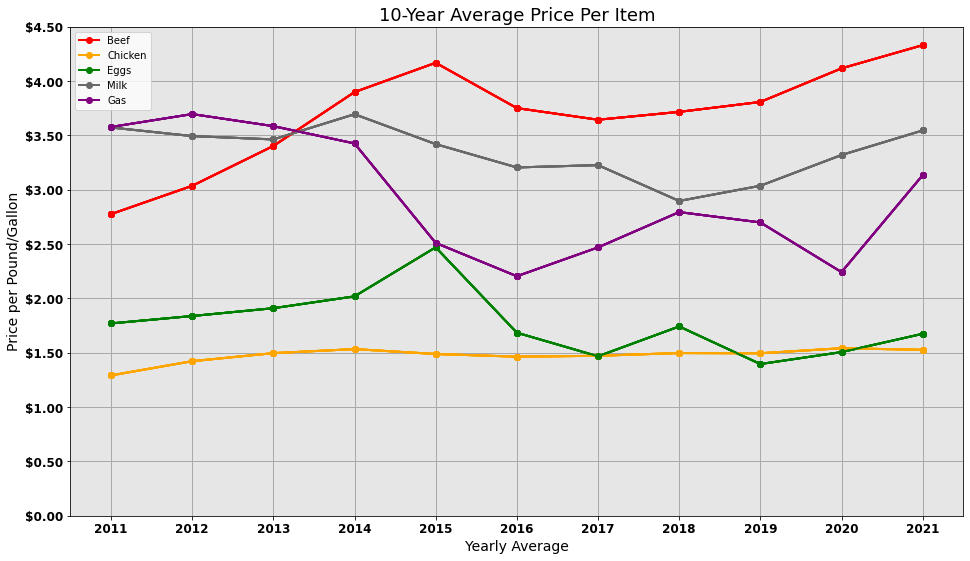

In [6]:
# this function line plots the average cost of each item over the last ten years
def plot_avg10year_ip(data, **kwargs):
    ip = np.array(data.iloc[:, 2:]).flatten()
    x = data['Year'].unique()
    y = np.arange(0, math.ceil(max(ip)), step=0.5) 
    price_data = get_avg10year_ip(data)
    label_names = [i for i in price_data]
    colorscheme = ["red", "orange", "green", "dimgray", "purple"]
    col = np.arange(0, 5)
    fig, ax = plt.subplots(figsize=(16, 9))
    
    for i in range(len(data.columns[2:])):
        for j, k in enumerate(data.columns[2:]):
            ax.plot(price_data[k], linewidth=2, marker='o', color=colorscheme[j], label=data.columns[2:])
            
    ax.yaxis.set_major_formatter('${x:1.2f}')
    plt.yticks(y, fontsize=12, fontweight='bold')
    plt.xticks(x, fontsize=12, fontweight='bold')
    plt.title(label='10-Year Average Price Per Item', size=18)
    plt.ylabel('Price per Pound/Gallon', size=14)
    plt.xlabel('Yearly Average', size=14)
    plt.grid(color='darkgray', linestyle='-', linewidth=1)
    plt.gca().set_facecolor('0.9')
    plt.legend(label_names, loc='best')
    plt.show()

plot_avg10year_ip(df)

##### 10-Year Average Price for Various Commodities 2011 - 2021 in a Horizontal Bar Plot

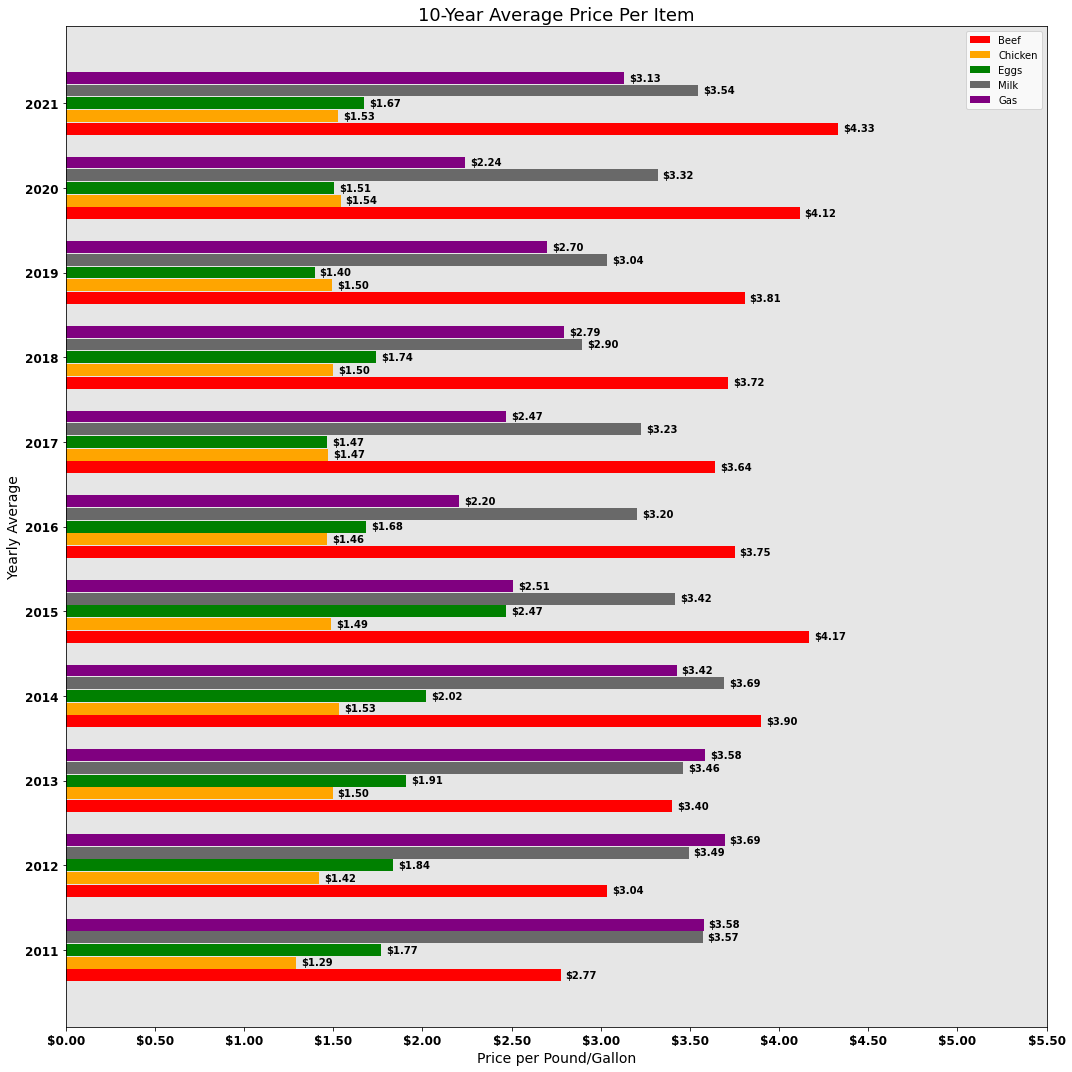

In [7]:
# this function bar plots the average cost of each item over the last ten years
def plot_avg10year_ip(data, **kwargs):
    ip = np.array(data.iloc[:, 2:]).flatten()
    x = data['Year'].unique()
    y = np.arange(0, math.ceil(max(ip)) + 1, step=0.5)
    a = [-0.30, -0.15, 0, 0.15, 0.30]
    height = 0.14
    price_data = get_avg10year_ip(data)
    label_names = [i for i in price_data]
    colorscheme = ["red", "orange", "green", "dimgray", "purple"]
    
    fig, ax = plt.subplots(figsize=(15, 15))

    for i in x:
        for j, k in enumerate(price_data):
            ax.barh(i + a[j], price_data[k][i], color=colorscheme[j], height=height, label=k)

    for p in ax.patches:
        ax.annotate("$%.2f" % p.get_width(), (p.get_width(), p.get_y()),
                    xytext=(5, 3), textcoords='offset points', fontweight='bold')
    
    ax.xaxis.set_major_formatter('${x:1.2f}')
    plt.yticks(x, fontsize=12, fontweight='bold')
    plt.xticks(y, fontsize=12, fontweight='bold')
    plt.title(label='10-Year Average Price Per Item', size=18)
    plt.ylabel('Yearly Average', size=14)
    plt.xlabel('Price per Pound/Gallon', size=14)
    plt.gca().set_facecolor('0.9')
    fig.tight_layout()
    ax.legend(label_names, loc='best')
    plt.show()
    
plot_avg10year_ip(df)

##### The Average Difference Between the Years 2011 and 2021

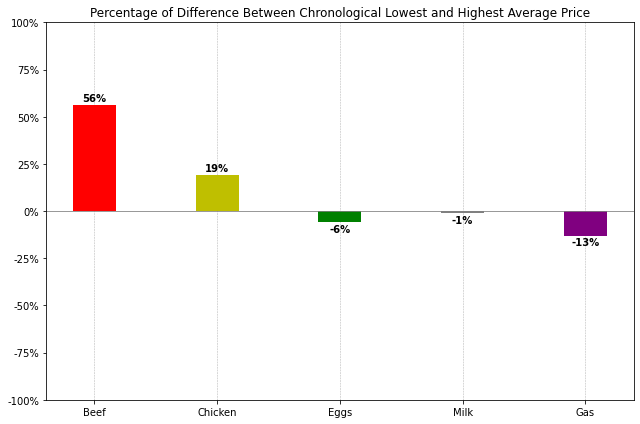

In [8]:
def get_delta(data, arg1, arg2):    
    delta = []
    x = []
    width = 0.35
    count = np.arange(len(arg1))

    for i in count:
        x.append(arg1[i][1]) 
        if arg2[i][0] > arg1[i][0]:
            delta.append(round(((arg2[i][2] - arg1[i][2]) / arg1[i][2]), 2))
        elif arg2[i][0] < arg1[i][0]:
            delta.append(round(-((arg2[i][2] - arg1[i][2]) / arg2[i][2]), 2))
        else:
            pass
        
    delta_percent = ['{:.0f}%'.format(delta[i] * 100) for i in count]
    delta_percent = np.array(delta_percent)
    
    fig, ax = plt.subplots(figsize=(9, 6))

    for i in count:
        if delta[i] > 0:
            plt.text(i, delta[i] + 0.01, delta_percent[i], ha='center', va='bottom', fontweight='bold')
        elif delta[i] < 0:
            plt.text(i, delta[i] - 0.01, delta_percent[i], ha='center', va='top', fontweight='bold')
        else:
            pass

    ax.bar(x, delta, zorder=2, color=('r', 'y', 'g', 'gray', 'purple'), width=width)
    
    ax.set_title('Percentage of Difference Between Chronological Lowest and Highest Average Price')
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylim(-1, 1)
    plt.grid(linestyle='--', linewidth=0.5, axis='x')
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    fig.tight_layout()
    plt.show()

arg1 = get_year_avgval(df, 2011)
arg2 = get_year_avgval(df, 2021)
get_delta(df, arg1, arg2)

##### (2011 - 2021) Lowest and Highest Average Prices for Food and Gas

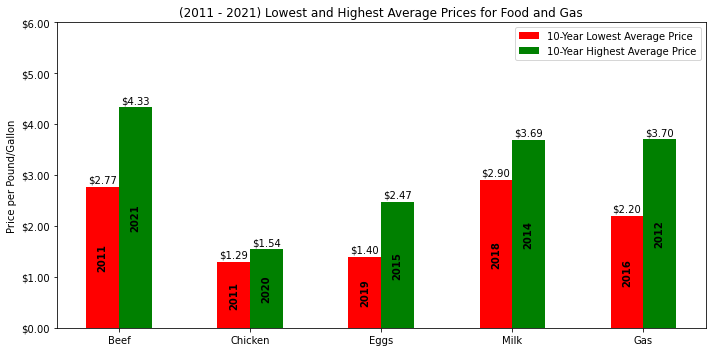

In [9]:
def plot_10year_minmax_avg_price(data):
    min_avg = get_minmax_avgval(data, 'min')
    max_avg = get_minmax_avgval(data, 'max')
    width = 0.25  # the width of the bars    
    items = []
    min_avg_ip = []
    max_avg_ip = []
    min_avg_year = []
    max_avg_year = []
    
    for i in range(len(max_avg)):
        items.append(max_avg[i][1])
        min_avg_year.append(min_avg[i][0])
        min_avg_ip.append(min_avg[i][2])
        max_avg_year.append(max_avg[i][0])
        max_avg_ip.append(max_avg[i][2])
        
    x = np.arange(len(items))  # the label locations
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bar1 = ax.bar(x - width/2, min_avg_ip, width, color='red', label='10-Year Lowest Average Price')
    bar2 = ax.bar(x + width/2, max_avg_ip, width, color='green', label='10-Year Highest Average Price')
    
    for i in range(len(max_avg)):
        plt.text(i + width/2, min_avg_ip[i], min_avg_year[i], ha='center', va='center', \
                 rotation='vertical', position=(i - width/2, min_avg_ip[i]/2), color='black', fontweight='bold')
        plt.text(i - width/2, max_avg_ip[i], max_avg_year[i], ha='center', va='center', \
                 rotation='vertical', position=(i + width/2, max_avg_ip[i]/2), fontweight='bold')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Price per Pound/Gallon')
    ax.set_title('(2011 - 2021) Lowest and Highest Average Prices for Food and Gas')
    ax.yaxis.set_major_formatter('${x:1.2f}')
    ax.set_xticks(x)
    ax.set_xticklabels(items)
    ax.bar_label(bar1, padding=2, labels=['${:.2f}'.format(x) for x in min_avg_ip],)
    ax.bar_label(bar2, padding=2, labels=['${:.2f}'.format(x) for x in max_avg_ip])
    fig.tight_layout()
    plt.ylim(0, 6)
    ax.legend()
    plt.show()

plot_10year_minmax_avg_price(df)

##### The Difference Between the Years With the Lowest Average Price and the Highest Average Price

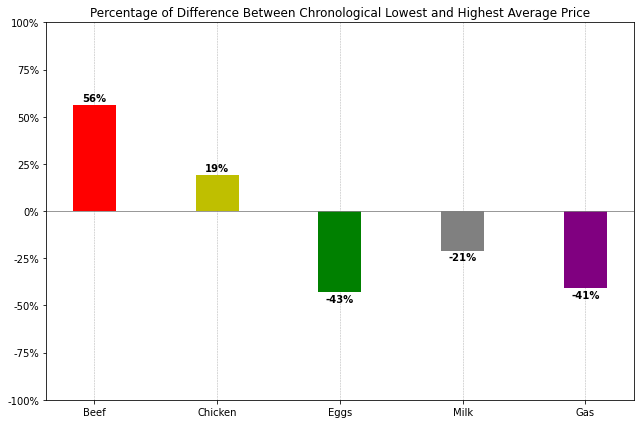

In [10]:
arg1 = get_minmax_avgval(df, 'min')
arg2 = get_minmax_avgval(df, 'max')
get_delta(df, arg1, arg2)

##### (2011 - 2021) Lowest and Highest Actual Price for Food and Gas

DataFrame [Lowest Values (0) and Highest Values (1)]
 ---------------------------------------------------- 
                        0                      1
0     [2011, Beef, 2.53]     [2020, Beef, 4.74]
1  [2011, Chicken, 1.24]  [2020, Chicken, 1.75]
2      [2019, Eggs, 1.2]     [2015, Eggs, 2.97]
3     [2018, Milk, 2.84]     [2014, Milk, 3.86]
4      [2016, Gas, 1.83]      [2011, Gas, 3.98] 
 ---------------------------------------------------- 



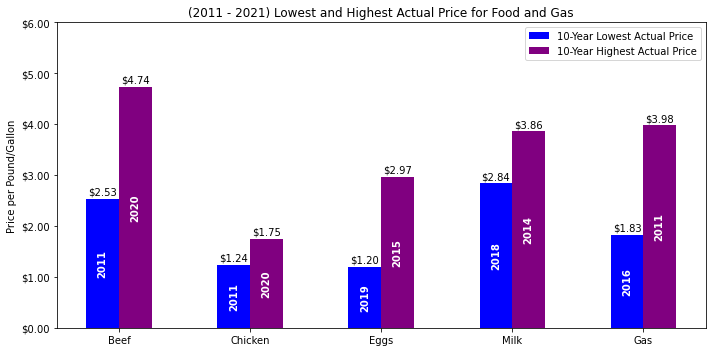

In [11]:
def plot_10year_minmax_actual_price(data):
    min_val = get_minmax_itemval(data, 'min')
    max_val = get_minmax_itemval(data, 'max')
    minmax_val = pd.DataFrame(zip(min_val, max_val))
    print('DataFrame [Lowest Values (0) and Highest Values (1)]\n','-' * 52, '\n', minmax_val, '\n', '-' * 52, '\n')
    items = [i[1] for i in minmax_val[0]]
    min_val_year = [i[0] for i in minmax_val[0]]
    max_val_year = [i[0] for i in minmax_val[1]]
    min_val_plot = []
    max_val_plot = []
    width = 0.25  # the width of the bars
    x = np.arange(len(minmax_val)) # the label locations
    
    for i in range(len(minmax_val)):
        min_val_plot.append(minmax_val[0][i][2])
        max_val_plot.append(minmax_val[1][i][2])
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bar1 = ax.bar(x - width/2, min_val_plot, width, color='blue', label='10-Year Lowest Actual Price')
    bar2 = ax.bar(x + width/2, max_val_plot, width, color='purple', label='10-Year Highest Actual Price')
    
    for i in x:
        plt.text(i - width/2, min_val_plot[i], min_val_year[i], ha='center', va='center', \
                 rotation='vertical', position=(i - width/2, min_val_plot[i]/2), color='white', fontweight='bold')
        plt.text(i + width/2, max_val_plot[i], max_val_year[i], ha='center', va='center', \
                 rotation='vertical', position=(i + width/2, max_val_plot[i]/2), color='white', fontweight='bold')
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Price per Pound/Gallon')
    ax.set_title('(2011 - 2021) Lowest and Highest Actual Price for Food and Gas')
    ax.yaxis.set_major_formatter('${x:1.2f}')
    ax.set_xticks(x)
    ax.set_xticklabels(items)
    ax.bar_label(bar1, padding=2, labels=['${:.2f}'.format(x) for x in min_val_plot])
    ax.bar_label(bar2, padding=2, labels=['${:.2f}'.format(x) for x in max_val_plot])
    fig.tight_layout()
    plt.ylim(0, 6)
    ax.legend()
    plt.show()

plot_10year_minmax_actual_price(df)

##### Monthly Prices for Items During the Year With the Lowest Average Price

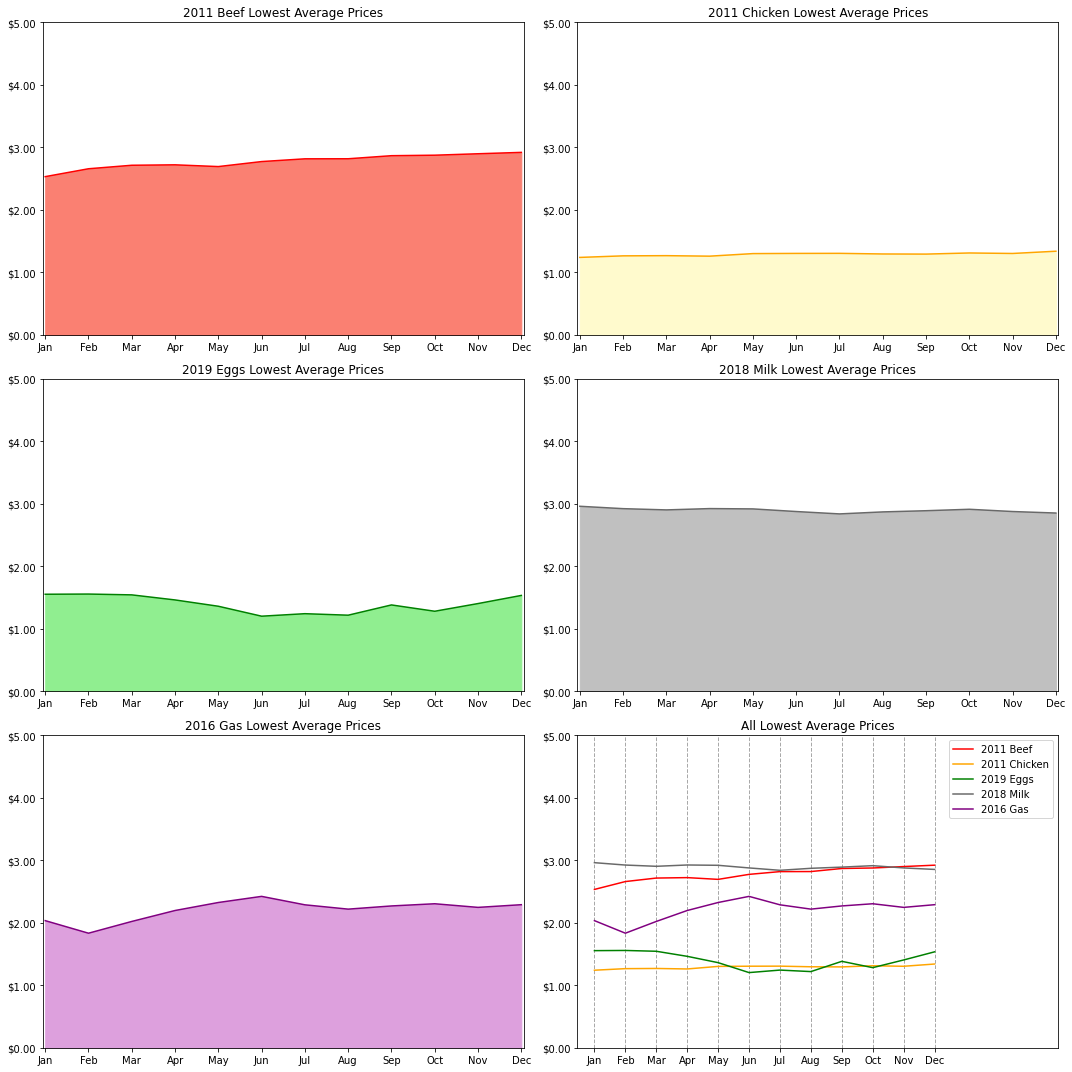

In [12]:
def subplots_func(data, label):
    maxvalue = max(df.iloc[:, 2])
    colorfill = ['salmon', 'lemonchiffon', 'lightgreen', 'silver', 'plum']
    cmap = ["red", "orange", "green", "dimgray", "purple"]
    items = [data[i][1] for i in range(len(data))]
    
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))

    for i in range(len(data)):
        ax = [ax1, ax2, ax3, ax4, ax5]
        num = data[i][:2]
        itemprices = data[i][2]
        x = df[df.Year == num[0]]
        n = x[num[1]]

        ax[i].set_title(f'{num[0]} {num[1]} {label}')
        ax[i].yaxis.set_major_formatter('${x:1.2f}')
        ax[i].fill_between(x.Month, 0, n, color=colorfill[i])
        ax[i].plot(x.Month, n, color=cmap[i])
        ax[i].margins(.005)
        ax[i].set_ylim(0, 5)
        
        ax6.set_title(f'All {label}')
        ax6.yaxis.set_major_formatter('${x:.2f}')
        ax6.grid(color='darkgray', linestyle='--', linewidth=1, axis='x')
        ax6.plot(x.Month, n, color=cmap[i], label=f'{num[0]} {num[1]}', )
        ax6.set_ylim(0, 5)
        fig.tight_layout()
        plt.xlim(right=15)
        plt.legend(loc='best')

minavg = get_minmax_avgval(df, 'min')
subplots_func(minavg, 'Lowest Average Prices')

##### Monthly Prices for Items During the Year With the Highest Average Price

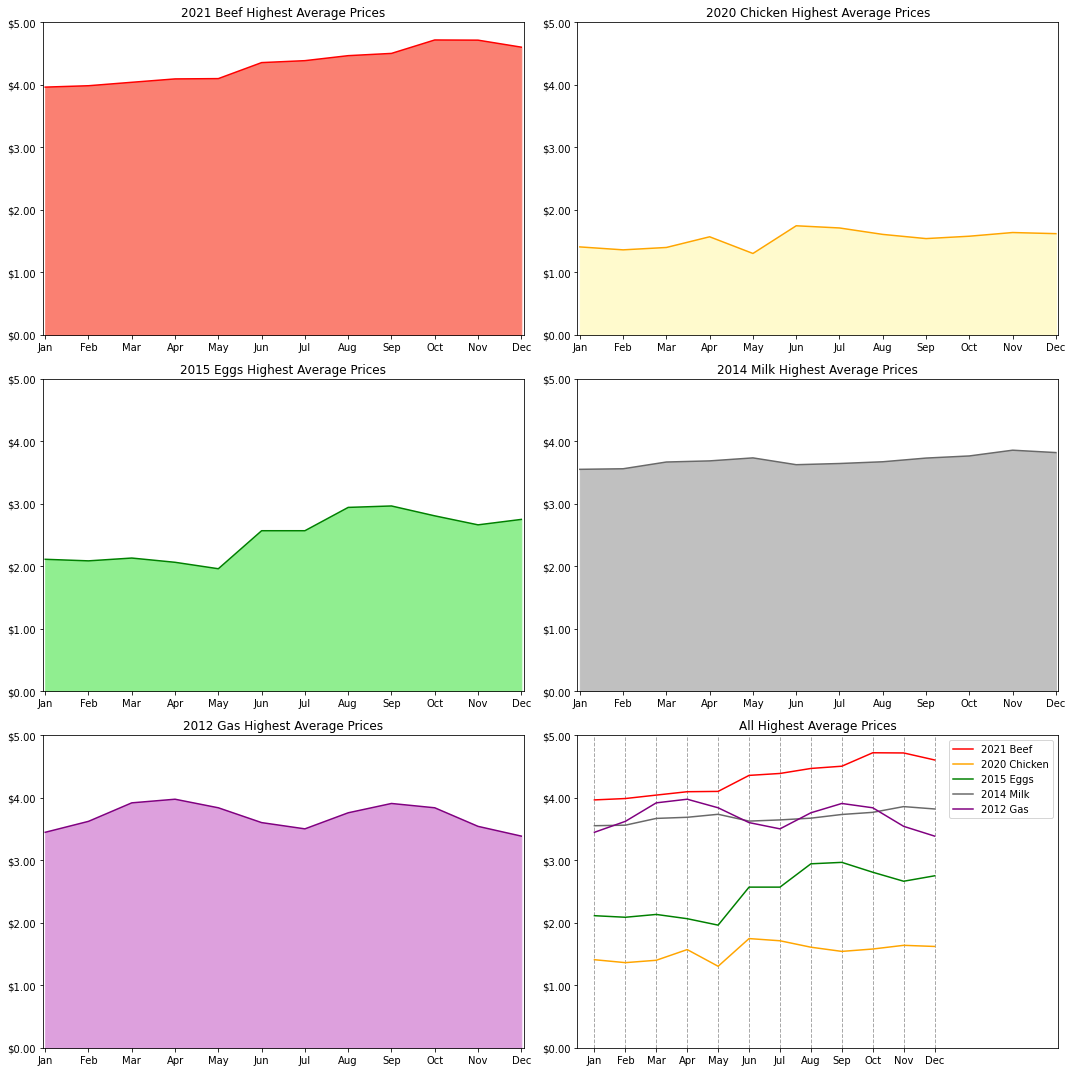

In [13]:
maxavg = get_minmax_avgval(df, 'max')
subplots_func(maxavg, 'Highest Average Prices')

##### Subplot Price Variance for Food and Gas

>This subplot shows the variance of each item on a monthly basis. For example, beef on average is around $4 and can increase or decrease by 20%.

2.9050417 0.036666665
1.3095001 0.03722222
1.6577692 -0.01923077
3.12 0.008
3.391263 0.14052631


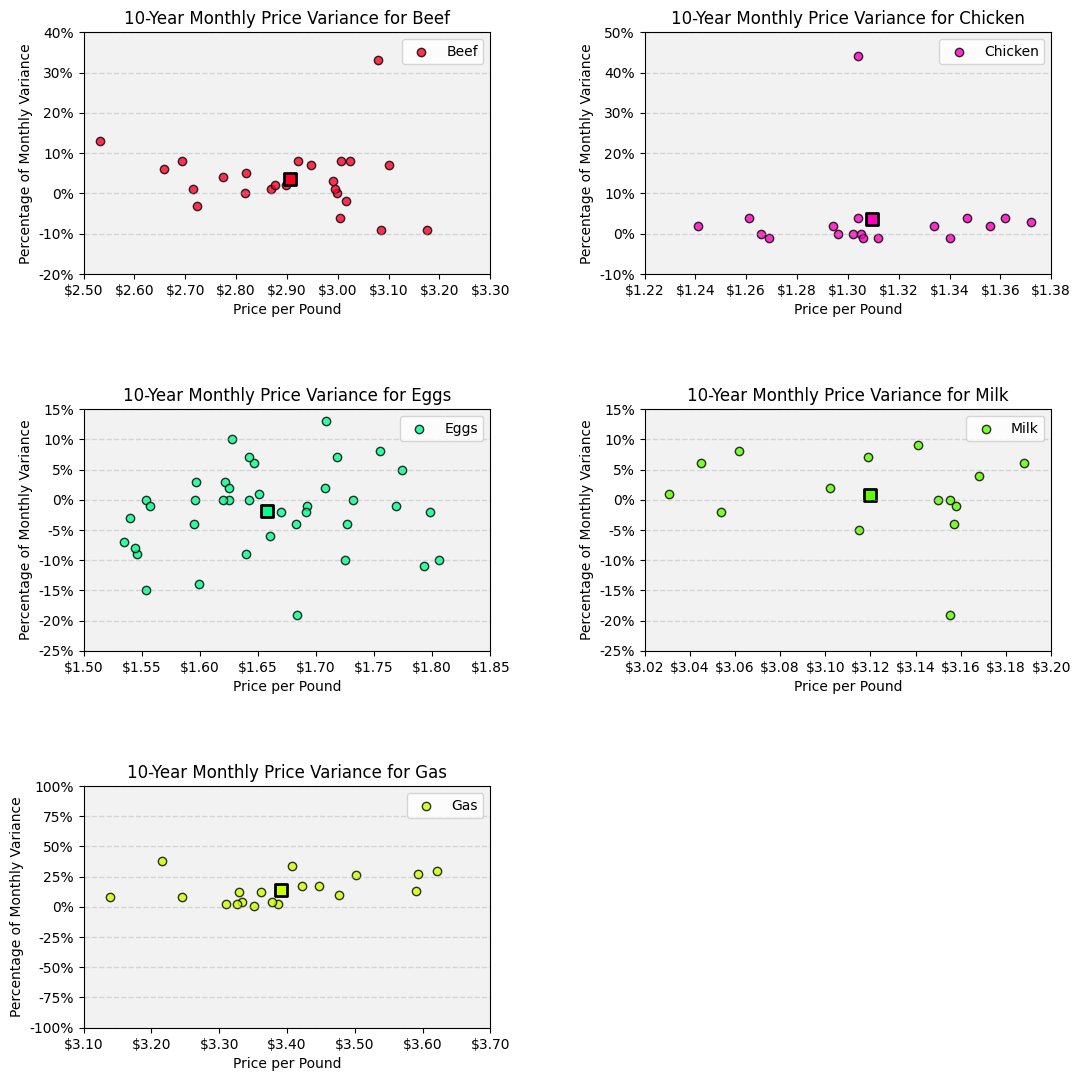

In [232]:
def get_num_data(items):
    num1 = []
    num1.append([df[items[i]] for i in range(len(items))])
    num1 = np.array(num1).reshape(5, 132).tolist()
    num2 = []
    num2 = num1
    num3 = []
    num4 = []
    
    for i in range(len(items)):
        for j in range(len(num1[i])-1):
            num3.append('{:.2f}'.format((num1[i][j] - num2[i][j+1]) * (-1)))
            if len(num3) == (len(num1[i])-1):
                num4.append(np.array(([[a, b] for a, b in zip(num1[i][:-1], num3)]), dtype='float32'))
                num3 = []
            
    return num4

def plot_avg_variance(data, k=5, col='gist_rainbow'):
    items = [i for i in data.columns[2:]]
    num5 = get_num_data(items)
    cluster = 0
    
    plt.figure(figsize=(12, 12), dpi=100)
    ax0 = plt.subplot2grid((3,2),(0, 0))
    ax1 = plt.subplot2grid((3,2),(0, 1))
    ax2 = plt.subplot2grid((3,2),(1, 0))
    ax3 = plt.subplot2grid((3,2),(1, 1))
    ax4 = plt.subplot2grid((3,2),(2, 0))
    
    for i, j in enumerate(items):
        ax = [ax0, ax1, ax2, ax3, ax4]
        centroids, labels = vq.kmeans2(num5[i], k, minit='points')
        cluster = num5[i][labels == i]
        count = np.bincount(labels)
        n = len(count)
        
        col = plt.cm.get_cmap(col)
        my_norm = colors.Normalize(0, n * i)
        map = cm.ScalarMappable(norm=my_norm, cmap=col)
        c = map.to_rgba(n)
        print(*centroids[i])
        ax[i].scatter(cluster[:, 0], cluster[:, 1], marker='o', color=c, edgecolors='black', alpha=.8, label=j)
        ax[i].scatter(*centroids[i], marker='s', s=80, color=c, edgecolors='black', alpha=1, linewidth=2)
        
        plt.ylim(-1, 1)
        ax[i].set_xticks(ax[i].get_xticks())
        ax[i].set_yticks(ax[i].get_yticks())
        ax[i].set_xticklabels(['${:,.2f}'.format(x) for x in ax[i].get_xticks()])
        ax[i].set_yticklabels(['{:,.0%}'.format(y) for y in ax[i].get_yticks()])
        ax[i].set_title(f'10-Year Monthly Price Variance for {j}', size=12)
        ax[i].set_ylabel('Percentage of Monthly Variance', size=10)
        ax[i].set_xlabel('Price per Pound', size=10)
        ax[i].set_facecolor('0.95')
        ax[i].grid(color='darkgray', linestyle='--', linewidth=1, axis='y', alpha=.4)
        plt.tight_layout(h_pad=5, pad=5)
        ax[i].legend()
        
        
data = df
k = 5

plot_avg_variance(data, k)

##### Closeup Price Variance for Food and Gas

In [ ]:
def plot_avg_variance(data, k=5, col='red', item=None, **kwargs):
    num = [i for i in df[item]]
    num2 = []
    num3 = []
    num2 = num

    for i in range(len(num)-1):
        num3.append('{:.2f}'.format((num[i] - num2[i+1]) * (-1)))
    
    num.pop(1)
    num4 = np.array(([[i, j] for i, j in zip(num, num3)]), dtype='float32')
    centroids, labels = vq.kmeans2(num4, k, minit='points')
    count = np.bincount(labels)
    n = len(count)
    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    
    for i in range(len(count)):
        k = num4[labels == i]
        
        ax.scatter(k[:, 0], k[:, 1], marker='o', color=col, edgecolors='black', alpha=.8)
        ax.scatter(*centroids[i], marker='s', s=80, color=col, edgecolors='black', alpha=1, linewidth=2)

        plt.ylim(-1, 1)
        ax.set_xticks(ax.get_xticks())
        ax.set_yticks(ax.get_yticks())
        ax.set_xticklabels(['${:,.2f}'.format(x) for x in ax.get_xticks()])
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.title(f'10-Year Monthly Price Variance for {item}', size=12)
        plt.ylabel('Percentage of Monthly Variance', size=10)
        plt.xlabel('Price per Pound/Gallon', size=10)
        plt.gca().set_facecolor('0.95')
        ax.grid(color='darkgray', linestyle='--', linewidth=1, axis='y', alpha=.4)


k = 1
items = [i for i in df.columns[2:]]
col = ["red", "orange", "green", "dimgray", "purple"]

for i in range(len(items)):
    plot_avg_variance(df, k, col[i], item=items[i])

>In conclusion, except for chicken, the commodities follow a similar trend as gas. However, one year between 2014 and 2015, beef and eggs increased in price as gas fell, while chicken and milk prices followed the drop in gas prices. Of all commodities, the cost of chicken was most stable. Over a decade, I expected the cost of all items to increase significantly. I found it interesting that in 2021, the price of eggs was less than in 2011, and the highest cost corresponded with a relatively low cost of gas in 2015.
Based on my analysis, I've learned that in times of inflation, the cost of beef, milk, and gas tends to increase by as much as fifty percent. Purchasing commodities, such as eggs and chicken, are a better choice during inflation, as the cost does not tend to increase by much. Chicken is the clear winner as a stable food choice during difficult times.